In [1]:
!pip install kagglehub seaborn --quiet

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download(
    "thedevastator/global-suicide-mental-health-substance-use-disor"
)
print("Ruta descargada:", path)

import os
print("Archivos en la carpeta descargada:")
print(os.listdir(path))


Using Colab cache for faster access to the 'global-suicide-mental-health-substance-use-disor' dataset.
Ruta descargada: /kaggle/input/global-suicide-mental-health-substance-use-disor
Archivos en la carpeta descargada:
['crude suicide rates.csv', 'share-with-alcohol-and-substance-use-disorders 1990-2016.csv']


In [4]:
# Dataset principal de tasas de suicidio
df_suicide = pd.read_csv(f"{path}/crude suicide rates.csv")

# Dataset de trastornos por alcohol y sustancias
df_disorders = pd.read_csv(
    f"{path}/share-with-alcohol-and-substance-use-disorders 1990-2016.csv"
)

df_suicide.head()


,Unnamed: 0,Unnamed: 1,"Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.1","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.2",Crude suicide rates (per 100 000 population),Crude suicide rates (per 100 000 population).1,Crude suicide rates (per 100 000 population).2
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female
1,Afghanistan,2016,29.8,31.8,27.7,4.7,7.6,1.5
2,Afghanistan,2015,29.8,31.9,27.8,4.8,7.8,1.5
3,Afghanistan,2010,31.7,34.1,29.4,5.1,8.6,1.4
4,Afghanistan,2005,34.1,36.5,31.6,6.3,10.8,1.5


## Exploración del conjunto de datos: salud mental y suicidio

En este notebook realizo una exploración de datos utilizando el dataset
global de tasas de suicidio y consumo de sustancias. El objetivo es analizar
las variables disponibles y reflexionar, con base en lo visto en clase,
si el problema se presta más para un enfoque de **regresión** (predicción
de una variable numérica continua) o de **clasificación**
(predicción de categorías).


In [5]:
print("===== Dataset de tasas de suicidio =====")
print("Shape:", df_suicide.shape)
print("\nInformación:")
df_suicide.info()
print("\nValores nulos:")
print(df_suicide.isna().sum())

print("\nDescripción numérica:")
print(df_suicide.describe())

print("\n===== Dataset de trastornos por sustancias =====")
print("Shape:", df_disorders.shape)
print("\nInformación:")
df_disorders.info()
print("\nValores nulos:")
print(df_disorders.isna().sum())

print("\nDescripción numérica:")
print(df_disorders.describe())


===== Dataset de tasas de suicidio =====
Shape: (916, 8)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                           --------------  ----- 
 0   Unnamed: 0                                                                                                                                       916 non-null    object
 1   Unnamed: 1                                                                                                                                       916 non-null    object
 2   Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respir

### Resumen de la exploración inicial

- El dataset de tasas de suicidio contiene información por país y año
  sobre tasas de suicidio, además de otras variables numéricas relacionadas.
- El dataset de trastornos por alcohol y sustancias contiene proporciones
  de población afectada por estos problemas, también por país y año.
- No se observan valores nulos importantes (o, si aparecen, indicar en qué variables).
- Las variables numéricas tienen rangos amplios, lo que sugiere diferencias marcadas
  entre países y a lo largo del tiempo.


In [6]:
df_suicide.columns


Index(['Unnamed: 0', 'Unnamed: 1',
       'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease',
       'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.1',
       'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.2',
       'Crude suicide rates (per 100 000 population)',
       'Crude suicide rates (per 100 000 population).1',
       'Crude suicide rates (per 100 000 population).2'],
      dtype='object')

In [9]:
# Verificamos el orden actual por si acaso
print(df_suicide.columns.tolist())

# Renombramos todas las columnas a nombres más cortos y manejables
df_suicide.columns = [
    "id0",  # Unnamed: 0
    "id1",  # Unnamed: 1
    "prob_muerte_cronica_total",
    "prob_muerte_cronica_hombres",
    "prob_muerte_cronica_mujeres",
    "tasa_suicidios_total",
    "tasa_suicidios_hombres",
    "tasa_suicidios_mujeres"
]

# Eliminamos las columnas identificadoras que no aportan al análisis
df_suicide = df_suicide.drop(columns=["id0", "id1"])

# Revisamos cómo quedó
df_suicide.head()


['Unnamed: 0', 'Unnamed: 1', 'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease', 'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.1', 'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.2', 'Crude suicide rates (per 100 000 population)', 'Crude suicide rates (per 100 000 population).1', 'Crude suicide rates (per 100 000 population).2']


,prob_muerte_cronica_total,prob_muerte_cronica_hombres,prob_muerte_cronica_mujeres,tasa_suicidios_total,tasa_suicidios_hombres,tasa_suicidios_mujeres
0,Both sexes,Male,Female,Both sexes,Male,Female
1,29.8,31.8,27.7,4.7,7.6,1.5
2,29.8,31.9,27.8,4.8,7.8,1.5
3,31.7,34.1,29.4,5.1,8.6,1.4
4,34.1,36.5,31.6,6.3,10.8,1.5


In [10]:
target_col = "tasa_suicidios_total"


In [11]:
print("Shape:", df_suicide.shape)
print("\nInformación del dataset:")
df_suicide.info()

print("\nValores nulos por columna:")
print(df_suicide.isna().sum())

print("\nDescripción estadística de las variables numéricas:")
df_suicide.describe()


Shape: (916, 6)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   prob_muerte_cronica_total    916 non-null    object
 1   prob_muerte_cronica_hombres  916 non-null    object
 2   prob_muerte_cronica_mujeres  916 non-null    object
 3   tasa_suicidios_total         916 non-null    object
 4   tasa_suicidios_hombres       916 non-null    object
 5   tasa_suicidios_mujeres       916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB

Valores nulos por columna:
prob_muerte_cronica_total      0
prob_muerte_cronica_hombres    0
prob_muerte_cronica_mujeres    0
tasa_suicidios_total           0
tasa_suicidios_hombres         0
tasa_suicidios_mujeres         0
dtype: int64

Descripción estadística de las variables numéricas:


,prob_muerte_cronica_total,prob_muerte_cronica_hombres,prob_muerte_cronica_mujeres,tasa_suicidios_total,tasa_suicidios_hombres,tasa_suicidios_mujeres
count,916,916,916,916,916,916
unique,243,282,242,241,316,151
top,18.1,22.6,23.1,3.2,4.2,1.5
freq,13,12,11,14,12,23


count     916
unique    241
top       3.2
freq       14
Name: tasa_suicidios_total, dtype: object


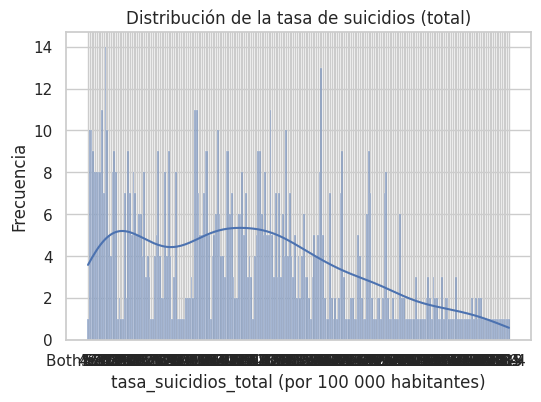

In [12]:
target_col = "tasa_suicidios_total"

# Estadísticos básicos
print(df_suicide[target_col].describe())

# Histograma
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df_suicide[target_col], kde=True)
plt.title("Distribución de la tasa de suicidios (total)")
plt.xlabel("tasa_suicidios_total (por 100 000 habitantes)")
plt.ylabel("Frecuencia")
plt.show()


### Análisis univariante como problema de regresión

La variable `tasa_suicidios_total` es numérica continua y representa la tasa
de suicidios por 100 000 habitantes. Esto significa que, si quisiéramos
predecir este valor para cada país o grupo, estaríamos frente a un problema
de **regresión**, ya que el objetivo es estimar un número real.

A partir del histograma se observa que la distribución no es completamente
uniforme y que existen valores más concentrados en ciertos rangos, lo que
indica que algunos países tienen tasas moderadas mientras que otros presentan
tasas mucho más altas.


In [14]:
df_suicide[target_col].dtype


dtype('O')

In [15]:
df_suicide[target_col] = pd.to_numeric(df_suicide[target_col], errors="coerce")


In [16]:
df_suicide[target_col].isna().sum()


np.int64(1)

In [17]:
df_suicide = df_suicide.dropna(subset=[target_col])


In [18]:
df_suicide["nivel_tasa_suicidio"] = pd.qcut(
    df_suicide[target_col],
    q=3,
    labels=["baja", "media", "alta"]
)

df_suicide["nivel_tasa_suicidio"].value_counts()


,count
nivel_tasa_suicidio,
media,307
baja,306
alta,302


In [19]:
df_suicide[target_col].head()


,tasa_suicidios_total
1,4.7
2,4.8
3,5.1
4,6.3
5,5.7


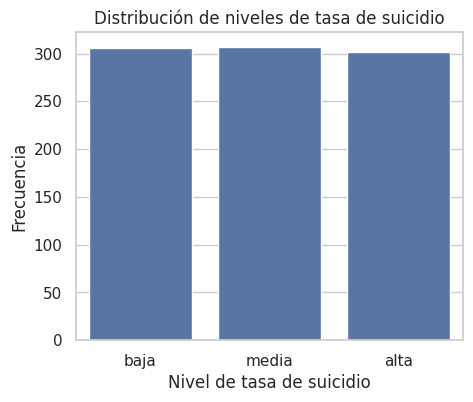

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(data=df_suicide, x="nivel_tasa_suicidio")
plt.title("Distribución de niveles de tasa de suicidio")
plt.xlabel("Nivel de tasa de suicidio")
plt.ylabel("Frecuencia")
plt.show()


### La variable `nivel_tasa_suicidio` muestra una distribución equilibrada entre las
tres clases: baja, media y alta. Esto ocurre porque se utilizaron cuantiles, lo cual
es útil en problemas de clasificación, ya que evita que una clase tenga demasiados
o muy pocos datos. Esto permite comparar el enfoque de clasificación con mayor estabilidad.


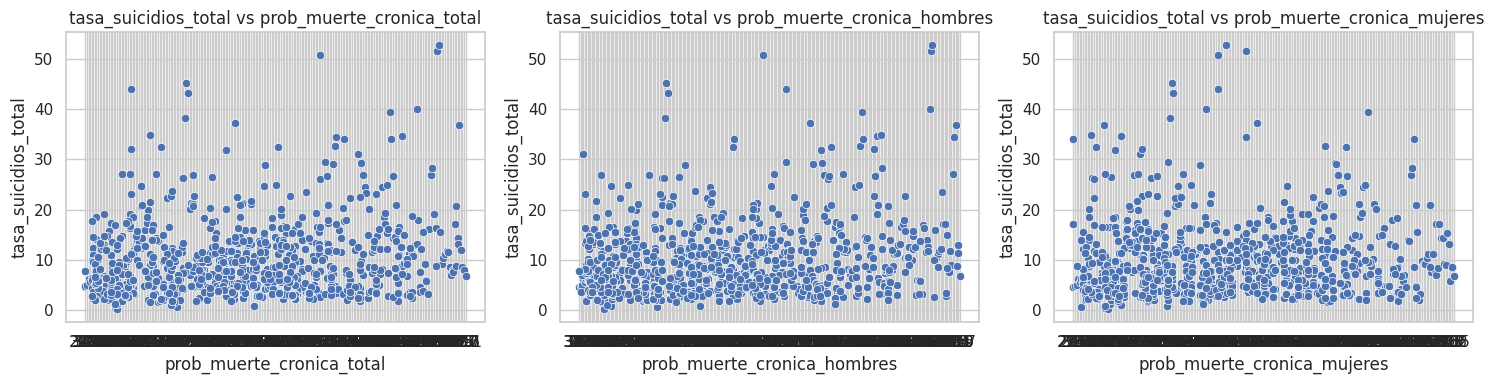

In [21]:
features = [
    "prob_muerte_cronica_total",
    "prob_muerte_cronica_hombres",
    "prob_muerte_cronica_mujeres"
]

plt.figure(figsize=(15,4))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_suicide, x=col, y=target_col)
    plt.title(f"{target_col} vs {col}")
plt.tight_layout()
plt.show()


### Análisis bivariante como regresión
Al analizar la relación entre la tasa de suicidios y las probabilidades de muerte
por enfermedades crónicas, se observa una dispersión amplia. Esto sugiere que la
relación no es completamente lineal, pero sí permite plantear la predicción de un
valor numérico continuo, lo que corresponde a un enfoque de regresión.


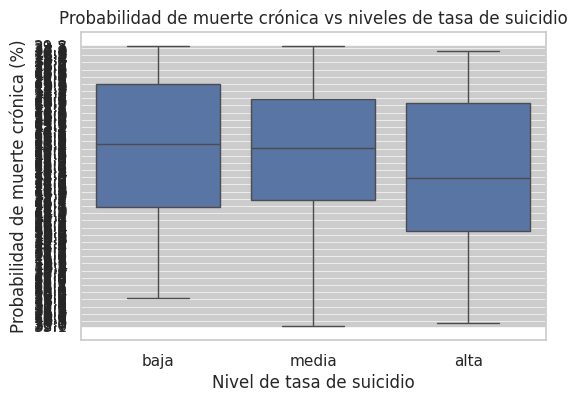

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_suicide,
    x="nivel_tasa_suicidio",
    y="prob_muerte_cronica_total"
)
plt.title("Probabilidad de muerte crónica vs niveles de tasa de suicidio")
plt.xlabel("Nivel de tasa de suicidio")
plt.ylabel("Probabilidad de muerte crónica (%)")
plt.show()


### Análisis bivariante como clasificación
Este tipo de gráfico permite comparar la distribución de una variable numérica entre
las clases definidas. La separación entre grupos muestra cómo la tasa categorizada
puede utilizarse para clasificar países en niveles de riesgo, lo cual se alinea con
un enfoque de clasificación.


## Conclusiones: Clasificación vs Regresión

La variable original `tasa_suicidios_total` es numérica continua, por lo que el
planteamiento natural del problema se orienta a la **regresión**, ya que el objetivo
sería predecir un valor numérico.

Sin embargo, al transformar esta variable en `nivel_tasa_suicidio` (baja, media, alta),
el problema puede formularse como una **clasificación**, donde el objetivo es asignar
cada registro a una categoría de riesgo.

Este ejercicio demuestra que la naturaleza de la variable objetivo determina si un
problema se aborda mediante regresión o clasificación, y que un mismo dataset puede
permitir ambos enfoques dependiendo de cómo se transforme la variable objetivo.


In [23]:
df_suicide.to_csv("suicide_processed.csv", index=False)
